In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

def new_Q(rows = 4, cols = 12):
    Q_tab = np.zeros((4, cols * rows))
    act_dict =  {"UP": Q_tab[0, :],"LEFT": Q_tab[1, :], "RIGHT": Q_tab[2, :], "DOWN": Q_tab[3, :]}
    
    return Q_tab

In [3]:
def e_greedy(state, Q_tab, epsilon = 0.1):
    
    decision  = np.random.random()
    
    if(decision < epsilon):
        action = np.random.choice(4) # UP = 0, LEFT = 1, RIGHT = 2, DOWN = 3
    else:
        action = np.argmax(Q_tab[:, state]) # Choose the action with largest Q-value (state value)
        
    return action

In [4]:
def agent_move(agent, action):

    (Position_X , Position_Y) = agent
    if ((action == 0) and Position_X > 0):
        Position_X = Position_X - 1
    if((action == 1) and (Position_Y > 0)):
        Position_Y = Position_Y - 1
    if((action == 2) and (Position_Y < 11)):
        Position_Y = Position_Y + 1
    if((action) == 3 and (Position_X < 3)):
        Position_X = Position_X + 1
    agent = (Position_X, Position_Y)
    
    return agent

In [5]:
def state_info(agent, Q_tab):
    
    (Position_X , Position_Y) = agent
    state = 12 * Position_X + Position_Y
    state_action = Q_tab[:, int(state)]
    max_state_val = np.amax(state_action) 
    return state, max_state_val

def reward_info(state):

    game_end = False
    reward = -1
    if(state == 47):
        game_end = True
        reward = 10
    if(state >= 37 and state <= 46):
        game_end = True
        reward = -100

    return reward, game_end

def updateq(Q_tab, state, action, reward, next_state_value, gamma_discount = 0.9, alpha = 0.5):

    update_q_value = Q_tab[action, state] + alpha * (reward + (gamma_discount * next_state_value) - Q_tab[action, state])
    Q_tab[action, state] = update_q_value

    return Q_tab

In [6]:
def previous_env(agent, env):

    (Position_Y, Position_X) = agent
    env[Position_Y][Position_X] = 1
    return env
    
def get_env_info(Q_tab, action):

    env = Q_tab[action, :].reshape((4, 12))
    print(env)
    
def plot_fucntion(reward_cache_qlearning, reward_cache_SARSA):
    cum_rewards_q = []
    rewards_mean = np.array(reward_cache_qlearning).mean()
    rewards_std = np.array(reward_cache_qlearning).std()
    count = 0 
    cur_reward = 0 
    for cache in reward_cache_qlearning:
        count = count + 1
        cur_reward += cache
        if(count == 10):

            normalized_reward = (cur_reward - rewards_mean)/rewards_std
            cum_rewards_q.append(normalized_reward)
            cur_reward = 0
            count = 0
            
    cum_rewards_SARSA = []
    rewards_mean = np.array(reward_cache_SARSA).mean()
    rewards_std = np.array(reward_cache_SARSA).std()
    count = 0 
    cur_reward = 0 
    for cache in reward_cache_SARSA:
        count = count + 1
        cur_reward += cache
        if(count == 10):

            normalized_reward = (cur_reward - rewards_mean)/rewards_std
            cum_rewards_SARSA.append(normalized_reward)
            cur_reward = 0
            count = 0      

    plt.plot(cum_rewards_q, label = "q_learning")
    plt.plot(cum_rewards_SARSA, label = "SARSA")
    plt.ylabel('Cumulative Rewards')
    plt.xlabel('Batches of Episodes (sample size 10) ')
    plt.title("Q-Learning/SARSA Convergence of Cumulative Reward")
    plt.legend(loc='lower right', ncol=2, mode="expand", borderaxespad=0.)
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.show()

In [7]:

def qlearning(num_episodes = 500, gamma_discount = 0.9, alpha = 0.5, epsilon = 0.1):

    reward_cache = list()
    step_cache = list()
    Q_tab = new_Q()
    agent = (3, 0)

    for episode in range(0, num_episodes):
        env = np.zeros((4, 12))
        env = previous_env(agent, env)
        agent = (3, 0)
        game_end = False
        reward_cum = 0 
        step_cum = 0 
        while(game_end == False):

            state, _ = state_info(agent, Q_tab)
            action = e_greedy(state, Q_tab)
            agent = agent_move(agent, action)
            step_cum += 1
            env = previous_env(agent, env)
            next_state, max_next_state_value = state_info(agent, Q_tab)
            reward, game_end = reward_info(next_state)
            reward_cum += reward 
            Q_tab = updateq(Q_tab, state, action, reward, max_next_state_value, gamma_discount, alpha)
            state = next_state
        reward_cache.append(reward_cum)
        if(episode > 498):
            print("Agent trained with Q-learning after 500 iterations")
            print(env) # display the last 2 path agent takes 
        step_cache.append(step_cum)
    return Q_tab, reward_cache, step_cache


In [8]:
def sarsa(num_episodes = 500, gamma_discount = 0.9, alpha = 0.5, epsilon = 0.1):

    Q_tab = new_Q()
    step_cache = list()
    reward_cache = list()
    for episode in range(0, num_episodes):
        agent = (3, 0) # starting from left down corner
        game_end = False
        reward_cum = 0 # cumulative reward of the episode
        step_cum = 0 # keeps number of iterations untill the end of the game
        env = np.zeros((4, 12))
        env = previous_env(agent, env)
        state, _ = state_info(agent, Q_tab)
        action = e_greedy(state, Q_tab)
        while(game_end == False):
            agent = agent_move(agent, action)
            env = previous_env(agent, env)
            step_cum += 1
            next_state, _ = state_info(agent, Q_tab)
            reward, game_end = reward_info(next_state)
            reward_cum += reward 
            next_action = e_greedy(next_state, Q_tab)
            next_state_value = Q_tab[next_action][next_state] # differs from q-learning uses the next action determined by policy
            Q_tab = updateq(Q_tab, state, action, reward, next_state_value, gamma_discount, alpha)
            # update the state and action
            state = next_state
            action = next_action # differs q_learning both state and action must updated
        reward_cache.append(reward_cum)
        step_cache.append(step_cum)
        if(episode > 498):
            print("Agent trained with SARSA after 500 iterations")
            print(env) # display the last 2 path agent takes 
    return Q_tab, reward_cache, step_cache


Agent trained with SARSA after 500 iterations
[[1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Agent trained with Q-learning after 500 iterations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]]


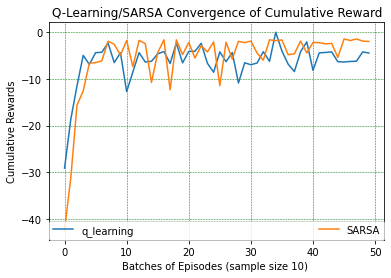

In [9]:
def main():

    Q_tab_SARSA, reward_cache_SARSA, step_cache_SARSA = sarsa()
    Q_tab_qlearning, reward_cache_qlearning, step_cache_qlearning = qlearning()
    plot_fucntion(reward_cache_qlearning,reward_cache_SARSA)

    
if __name__ == "__main__":
    # call main function to execute grid world
    main()